In [1]:
import pandas as pd
import logomaker
import os

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [2]:
alignment = pd.read_csv('chemical/alignment_CLUMP_0.tsv')
alignment

,0
0,GHWT__
1,GHWTQ_
2,_HWT__
3,_HWTQ_
4,_WWS__
5,__WNT_
6,__YSHS
7,__CQY_
8,FSVF__
9,FSL___


In [3]:
alignment = pd.read_csv('chemical/alignment_CLUMP_0.tsv')
lst_alignment = list(alignment['0'])
lst_alignment

['GHWT__',
 'GHWTQ_',
 '_HWT__',
 '_HWTQ_',
 '_WWS__',
 '__WNT_',
 '__YSHS',
 '__CQY_',
 'FSVF__',
 'FSL___',
 '___NVY',
 '__WNS_',
 '_FTNS_',
 '_HWF__']

In [4]:
matrix_alignment = logomaker.alignment_to_matrix(lst_alignment)
matrix_alignment

,C,F,G,H,L,N,Q,S,T,V,W,Y,_
pos,,,,,,,,,,,,,
0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
1,0.0,1.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,5.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,8.0,1.0,1.0
3,0.0,2.0,0.0,0.0,0.0,4.0,1.0,2.0,4.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,1.0,6.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0


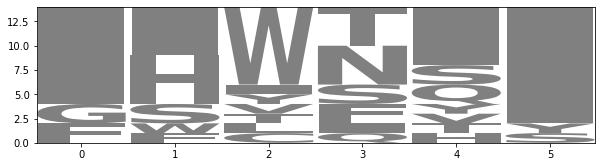

In [5]:
logomaker.Logo(matrix_alignment)

In [6]:
## the column '_' causes the a bar to appear in the logo at that position
# the '_' is, briefly, treated as a letter.
# We cannot just delete the column, beacuse the sum of each row
# (each position) has to be the same. Otherwise there will be a blank
# bar for the non covered bits.

for index_row in range(len(matrix_alignment)):
    
    cell_gaps = matrix_alignment.loc[index_row, '_']
    row = matrix_alignment.loc[index_row]
    
    if cell_gaps != 0:
        # checking if there are gaps at that position 
        print('there are gaps at position: ', index_row)
        
        sum_bits_row = row.sum()   
        sum_row_no_gap = row.sum() - matrix_alignment.loc[index_row, '_']
        
        for col in matrix_alignment:
            if matrix_alignment.loc[index_row, '_'] != 0:
                
                new_value = (matrix_alignment.loc[
                    index_row, col]/sum_row_no_gap) * sum_bits_row
                matrix_alignment.loc[index_row, col] = new_value
                
matrix_alignment.drop(columns = '_', inplace = True)               
matrix_alignment            

there are gaps at position:  0
there are gaps at position:  1
there are gaps at position:  2
there are gaps at position:  3
there are gaps at position:  4
there are gaps at position:  5


,C,F,G,H,L,N,Q,S,T,V,W,Y
pos,,,,,,,,,,,,
0,0.000000,7.000000,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.555556,0.0,7.777778,0.000000,0.000000,0.000000,3.111111,0.000000,0.000000,1.555556,0.000000
2,1.076923,0.000000,0.0,0.000000,1.076923,0.000000,0.000000,0.000000,1.076923,1.076923,8.615385,1.076923
3,0.000000,2.153846,0.0,0.000000,0.000000,4.307692,1.076923,2.153846,4.307692,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,1.750000,0.000000,0.000000,3.500000,3.500000,1.750000,1.750000,0.000000,1.750000
5,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,7.000000


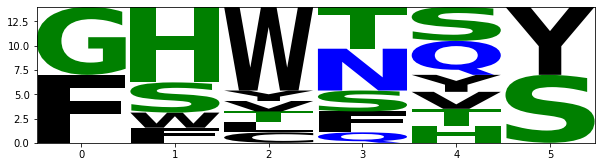

In [8]:
logomaker.Logo(matrix_alignment, color_scheme = 'hydrophobicity')

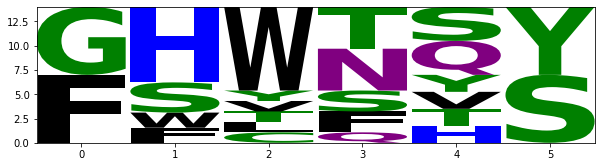

In [9]:
logomaker.Logo(matrix_alignment, color_scheme = 'chemistry')

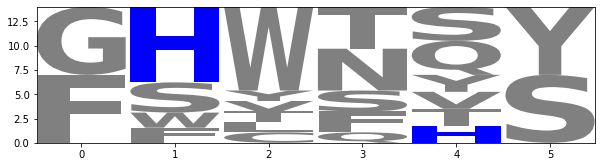

In [10]:
logomaker.Logo(matrix_alignment, color_scheme = 'charge')

In [11]:
# blue -> helix
# red -> sheet
# green -> turn
dict_second_structure_propensity = {'E':'blue','A':'blue','L':'blue',
                                    'M':'blue','Q':'blue','K':'blue',
                                    'R':'blue','H':'blue',
                                    'V':'red','I':'red','Y':'red','C':'red',
                                    'W':'red','F':'red','T':'red',
                                    'G':'green','N':'green','P':'green',
                                    'S':'green','D':'green'}

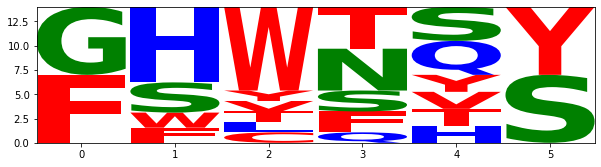

In [12]:
logomaker.Logo(matrix_alignment, color_scheme = dict_second_structure_propensity)